# Analyze daily max temperatures for a set of cities in the US

In [35]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Connet to database and read data to DataFrame:

In [36]:
con = lite.connect('/Users/Stephanie/desktop/thinkful/projects/U3L2-clouds/weather.db')
cur = con.cursor()

df = pd.read_sql_query('SELECT * FROM daily_temp ORDER BY day',con, index_col='day')

df.index = df.index.map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.index = pd.to_datetime(df.index)

## Plot temperature by city and region

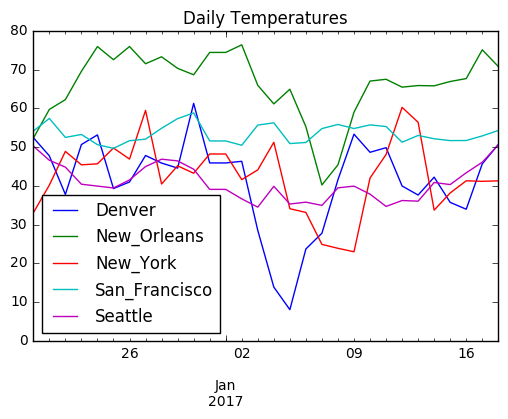

In [37]:
df.plot(title='Daily Temperatures', legend=True)
plt.show()

After plotting the temperature by city, we can observe two clearly different trends
between the cities on the west coast and the rest of the cities.

While West Coast temperatures are much more stable, there's an important drop in temperature
in the rest of the cities at the beginning of January. This change is even more abrupt in the case of Denver,
probably due to it's position away from the sea shore.

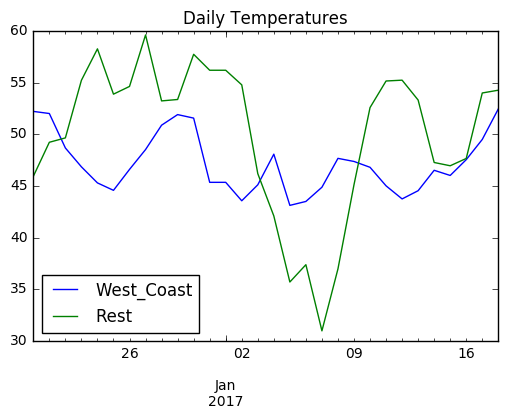

In [38]:
df['West_Coast'] = df[['San_Francisco', 'Seattle']].mean(axis=1)
df['Rest'] = df[['New_Orleans', 'New_York', 'Denver']].mean(axis=1)

df[['West_Coast', 'Rest']].plot(title='Daily Temperatures', legend=True)
plt.show()


## Range, Mean and Variance

In [39]:
df.describe().loc[['count', 'mean', 'min', 'max']]

,Denver,New_Orleans,New_York,San_Francisco,Seattle,West_Coast,Rest
count,30.000000,30.000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.367667,66.048,42.435667,53.448333,40.878333,47.163333,49.950444
min,8.050000,40.230,22.990000,49.680000,34.510000,43.110000,30.966667
max,61.280000,76.390,60.250000,58.810000,50.590000,52.440000,59.603333


In [40]:
df.max() - df.min()

Denver           53.230000
New_Orleans      36.160000
New_York         37.260000
San_Francisco     9.130000
Seattle          16.080000
West_Coast        9.330000
Rest             28.636667
dtype: float64

In [41]:
df.var()

Denver           136.055536
New_Orleans       77.401313
New_York          86.463060
San_Francisco      5.598463
Seattle           21.269732
West_Coast         8.203839
Rest              53.350807
dtype: float64

## Variation of temperature 

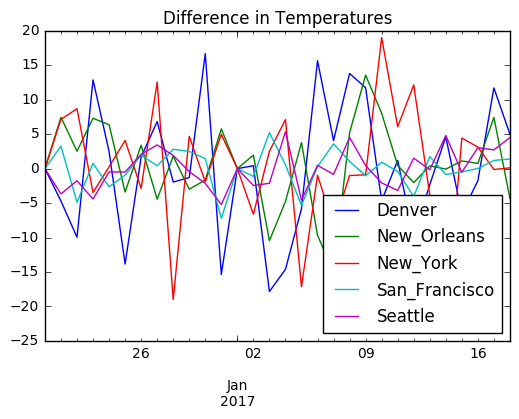

In [50]:
df_diff = df.diff()
df_diff = df_diff.fillna(0)
df_diff[['Denver', 'New_Orleans', 'New_York', 'San_Francisco', 'Seattle']].plot(title='Difference in Temperatures', legend=True)
plt.show()

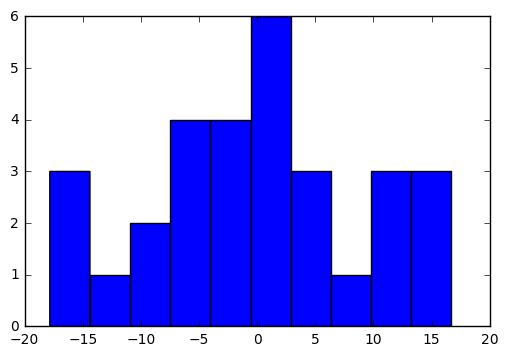

In [43]:
plt.hist(df_diff['Denver'])
plt.show()